In [49]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from statsmodels.distributions.empirical_distribution import ECDF
from collections import Counter
import matplotlib.pyplot as plt

#### Воспроизведем примеры из Сборника задач по математике т.4 под редакцией А.В.Ефимова и А.С.Попелова. Все определения взяты также из данного сборника задач.

#### Глава 19. Математическая статистика

<p style="text-align: center"> <b>  §1. Методы статистического описания результатов </b> </p>

#### 1. Выборка и способы ее представления
Пример 1. Записать в виде вариационного и статистического рядов выборку 5,3,7,10,5,5,2,10,7,2,7,7,4,2,4. Определить размах выборки.

*Вариационным рядом выборки* $x_{1},x_{2},...,x_{n}$ называется способ её представления, при котором элементы упорядочиваются по её величине, т.е. записываются в виде последовательности $x^{(1)},x^{(2)},...,x^{(n)}$, где $x^{(1)} \leq x^{(2)} \leq...\leq x^{(n)}$. Разность между максимальным и минимальным элементами выборки $x^{(n)}-x^{(1)}=\omega$ называется *размахом* выборки.<br>
*Статистическим рядом* называется последовательность пар ($z_{i},n_{i}$). Обычно, статистический рад записывается в виде таблицы, первая строка которой содержит элементы $z_{i}$, а вторая - их частоты.

In [50]:
Arr = np.array([5,3,7,10,5,5,2,10,7,2,7,7,4,2,4])

В Python есть несколько библиотек, необходимых для решения подобных задач. В зависимотси от конкретной задачи, целесообразно использовать одну из них: <br>
$\textbf{numpy}$ - пожалуй, основная библиотека для работы с числовыми данными в python. Написана на C и оптимизирована для работы с многомерными массивами, что обеспечивает достаточно высокое быстродействие; <br>
$\textbf{pandas}$ - преднанзначена для задач аналитики. Позволят строить красивые таблицы, использовать SQL подобные операции. Pandas написана поверх numpy на python и, как следствие, имеет более низкую производительность; <br>
Раз уж мы решаем задачи статистики, стоит упомянуть $\textbf{statsmodels}$  - реализация статистических моделей. Написана поверх numpy и scipy. Результаты работы в statsmodels похожи на аналогичные вычисления в языке R; <br>
$\textbf{scipy}$ - библиотека всевозможных научных расчетов. Написана на Python,С,С++.

In [51]:
# Решение с помощью numpy

In [52]:
# Размах
w = Arr.max() - Arr.min()

In [53]:
# Вариационный ряд
# sort - остортирует элементы в порядке возрастания, т.е. получим вариационный ряд
Arr.sort()

In [54]:
Arr

array([ 2,  2,  2,  3,  4,  4,  5,  5,  5,  7,  7,  7,  7, 10, 10])

In [55]:
# Статистический ряд
# z - уникальные числа, n - частоты
z,n = np.unique(Arr, return_counts=True)
S = np.vstack((z,n))

In [56]:
S

array([[ 2,  3,  4,  5,  7, 10],
       [ 3,  1,  2,  3,  4,  2]])

Проверим, что $$\sum_{n=1}^{k}n_{i}=n,$$ где k-число различных чисел в выборке.

In [57]:
n.sum() == len(Arr)

True

In [58]:
# Решим то же самое и сипользованием pandas

In [59]:
df = pd.DataFrame(Arr, columns=['x'])

In [60]:
w = df.x.max() - df.x.min()

In [61]:
df.x.sort_values().values

array([ 2,  2,  2,  3,  4,  4,  5,  5,  5,  7,  7,  7,  7, 10, 10])

In [62]:
s = df.x.value_counts().sort_index()

In [63]:
s = pd.DataFrame({"z": s.index.values, "n":s.values})

In [64]:
s

,z,n
0,2,3
1,3,1
2,4,2
3,5,3
4,7,4
5,10,2


In [65]:
s.style.hide_index()

z,n
2,3
3,1
4,2
5,3
7,4
10,2


In [66]:
s.T

,0,1,2,3,4,5
z,2,3,4,5,7,10
n,3,1,2,3,4,2


Пример 2. Представить выборку из 55 наблюдений в виде таблицы частот, используя 7 нтервалов группировки. Выборока:
<p style="text-align: center"> 
              20.3, 15.4, 17.2, 19.2, 23.3, 18.1, 21.9,<br>
              15.3, 16.8, 13.2, 20.4, 16.5, 19.7, 20.5,<br>
              14.3, 20.1, 16.8, 14.7, 20.8, 19.5, 15.3,<br>
              19.3, 17.8, 16.2, 15.7, 22.8, 21.9, 12.5,<br>
              10.1, 21.1, 18.3, 14.7, 14.5, 18.1, 18.4,<br>
              13.9, 19.1, 18.5, 20.2, 23.8, 16.7, 20.4,<br>
              19.5, 17.2, 19.6, 17.8, 21.3, 17.5, 19.4,<br>
              17.8, 13.5, 17.8, 11.8, 18.6, 19.1 </p>

При большом объеме выборки её элементы объединяют в гурпы (разряды), представляя результаты опытов в виде  $\textit{группированого статистического ряда}$. Для этого интервал, содержащий все элементы выборки, разбивается на k интервалов. Инервалы имеют длину *b*$\approx$$\frac{\omega}{k}$. После того, как частичные интервалы выбраны, определяют частоты - количество $n_{i}$ элементов выборки, попавших в i-й интервал. Полученный статистический ряд в верхней строке содержит середины $z_{i}$ интервалов группировки, а в нижней частоты $n_{i}$ (i=1,2,...,k).<br>
Наряду с частотами одновременно подсчитываются также накопленные частоты  $\sum_{j=1}^{i}n_{j}$, относительные частоты $\frac{n_{i}}{n}$. Полученные результаты сводятся в таблицу, называемую *таблицей частот группированной выборки*.

Сразу отметим, что в книге есть опечатка, и количество элементов на интервале 18-20 и 20-22 отличается на 1. Будем использовать приведенную выборку, но графики будут слегка отличаться от приведенных в книге.

In [67]:
# Решать эту задачу на numpy нет особого смысла, т.к. группированный статистический ряд 
# предназначен для анализа человеком, чтоб на него посмотреть глазами. А это типичная задача pandas.

In [68]:
M = np.array([20.3, 15.4, 17.2, 19.2, 23.3, 18.1, 21.9,
              15.3, 16.8, 13.2, 20.4, 16.5, 19.7, 20.5,
              14.3, 20.1, 16.8, 14.7, 20.8, 19.5, 15.3,
              19.3, 17.8, 16.2, 15.7, 22.8, 21.9, 12.5,
              10.1, 21.1, 18.3, 14.7, 14.5, 18.1, 18.4,
              13.9, 19.1, 18.5, 20.2, 23.8, 16.7, 20.4,
              19.5, 17.2, 19.6, 17.8, 21.3, 17.5, 19.4,
              17.8, 13.5, 17.8, 11.8, 18.6, 19.1])

In [69]:
def freq_grouped_values(M: np.array, n_intervals: int) -> pd.DataFrame:
    """
    Таблица частот группированной выборки
    """
    df = pd.DataFrame(M)
    start = round(min(M))
    w = max(M)-min(M)
    b = round(w/n_intervals)
    end = round(max(M))
    L = len(M)
    df = df.groupby(pd.cut(M, np.arange(start,end+b,b))).agg(['count'])
    df.columns = df.columns.get_level_values(0)
    df.columns = ['Freq']
    mid_points = np.arange(start+b/2,end,b)
    df['Mid_points'] = mid_points
    df['Cum_freq'] = df['Freq'].cumsum()
    df['Rel_freq'] = df['Freq'] / L
    df['Rel_c_freq'] = df['Cum_freq'] / L
    df = df[['Mid_points','Freq','Cum_freq','Rel_freq','Rel_c_freq']]
    return df.round(4)

In [70]:
# значеия понадобятся дальше
n_intervals = 7
w = max(M)-min(M)
b = round(w/n_intervals)
start = round(min(M))
end = round(max(M))

In [71]:
T = freq_grouped_values(M,n_intervals)

In [72]:
T

,Mid_points,Freq,Cum_freq,Rel_freq,Rel_c_freq
"(10.0, 12.0]",11.0,2,2,0.0364,0.0364
"(12.0, 14.0]",13.0,4,6,0.0727,0.1091
"(14.0, 16.0]",15.0,8,14,0.1455,0.2545
"(16.0, 18.0]",17.0,12,26,0.2182,0.4727
"(18.0, 20.0]",19.0,15,41,0.2727,0.7455
"(20.0, 22.0]",21.0,11,52,0.2000,0.9455
"(22.0, 24.0]",23.0,3,55,0.0545,1.0000


Пусть ($x_{1}$,$x_{2}$,...,$x_{n}$) - выборка из генеральной совокупности с функцией распределения $F_{x}(x)$. $\textit{Распределением выборки}$ называется распределение дискретной случайной величины, принимающей значения распределения $x_{1}$,$x_{2}$,...,$x_{n}$ с вероятностями $\frac{1}{n}$. Соответствующая функция распределения называется $\textit{эмперической (выборочной) функцией распределения}$ и обозначается $F_{n}^{*}(x)$.

Эмперическая функция распределения определяется по значениям накопленных частот соотношением
$$F_{n}^{*}(x)=\frac{1}{n}\sum_{z_{i}<x}n_{i},$$
суммируются частоты тех элементо выборки, для которых выполняется неравенство $z_{i}<x$.

$\textit{Гистограммой частот}$ группированной выборки называется кусочно-постоянная функция, постоянная на интервалах группировки и принимающая на каждом их них значения $\frac{n_{i}}{b}$, i=1.2...k соответственно. Аналогично определяется гитограмма относительных частот.

$\textit{Полигоном частот}$ называется ломаная с вершинами в точках ($z_{i},\frac{n_{i}}{b}$), i=1.2...k, а полигоном относительных частот - ломаная с вершинами в точках ($z_{i},\frac{n_{i}}{nb}$), i=1.2...k.

Пример 3. Построить гистограмму и полигон частот, а также график эмпирической функции распределения группированной выборки из примера 2.

In [73]:
# Реализуем функцию эмпирического распределения в лоб - для наглядности

In [74]:
def empirical_distribution(M:np.array,T:pd.DataFrame)->np.array:
    """
    Эмперическая функция распределения
    """
    F = []
    L = len(M)
    for x in M:
        f = 0
        for i,row in T.iterrows():
            z = row.Mid_points
            n = row.Freq
            if z < x:
                f+=n
        F.append(f/L)
    return np.unique(np.array(F))

In [75]:
F = empirical_distribution(M,T)

In [76]:
F

array([0.        , 0.03636364, 0.10909091, 0.25454545, 0.47272727,
       0.74545455, 0.94545455, 1.        ])

In [77]:
# В англоязычной литературе эмперическая функция распределения известна как 
# empirical cumulative distribution function - ECDF. Её реализация есть в библиотеке statsmodels.

In [78]:
# ECDF принимает на вход массив, а возвращает функцию, которая показывает значение функции F(x)
ecdf = ECDF(M)

In [79]:
F_ = [round(ecdf(x),4) for x in np.arange(start,end+b,b)]
F = F.round(4)

In [80]:
# Проверим, что наша реализация работает корректно

In [81]:
F == F_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [82]:
# Построим указанные графики

Text(0.5, 1.0, 'Эмперическая функция распределения')

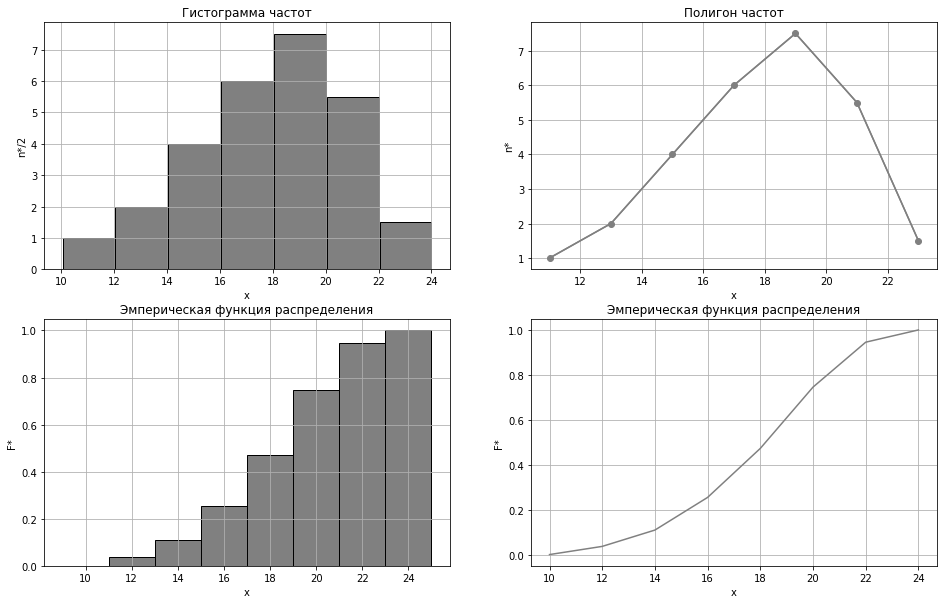

In [83]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
x = np.arange(start+b,end+b,b)
axes[0,0].bar(x=x, height=T.Freq/b, width=-1.96, linewidth=1, color='grey', edgecolor='black',align='edge')
axes[0,0].grid(True)
axes[0,0].set_xlabel("x")
axes[0,0].set_ylabel("n*/2")
axes[0,0].set_title("Гистограмма частот")

axes[0,1].grid(True)
axes[0,1].plot(T.Mid_points, T.Freq/b, color='grey')
axes[0,1].plot(T.Mid_points, T.Freq/b, marker='o', color='grey', markersize=6)
axes[0,1].set_xlabel("x")
axes[0,1].set_ylabel("n*")
axes[0,1].set_title("Полигон частот")

x = np.arange(start,end+b,b)
axes[1,0].bar(x=x, height=F, width=-2, color='grey', edgecolor='black',align='center')
axes[1,0].grid(True)
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("F*")
axes[1,0].set_title("Эмперическая функция распределения")

axes[1,1].plot(x,F, color='grey')
axes[1,1].grid(True)
axes[1,1].set_xlabel("x")
axes[1,1].set_ylabel("F*")
axes[1,1].set_title("Эмперическая функция распределения")

#### 2. Числовые характеристики выборочного представления

Для выборочного распределения математическое ожидание определяется как
$$m_{x}^{*}(x)=\frac{1}{n}\sum_{j=1}^{n}x_{j},$$

Дисперсия
$$D_{x}^{*}(x)=\frac{1}{n}(\sum_{j=1}^{n}x_{j}^{2}-n\overline{x}^{2}).$$

Выборочной модой $d_{x}^{*}$ унимодального распределения называется элемент выборки, встречающийся с наибольшей частотой.

Выборочной медианой $h_{x}^{*}$ называется число, которое делит вариационный ряд на две части, содержащие равное число элементов. 

Пример 5. Определить среднее, моду и медиану для выборки 5,6,8,2,3,1,1,4.

In [84]:
# Выборка
Arr = np.array([5,6,8,2,3,1,1,4])

In [85]:
# Реализуем вручную указанные функции

In [86]:
def my_mean(Arr: np.array)->float:
    """Среднее"""
    return Arr.sum()/(len(Arr))

def my_mode(Arr: np.array)->float:
    """Мода"""
    c = Counter()
    for n in Arr:
        c[n]+=1
    dx = c.most_common(1)
    return dx

def median(Arr: np.array)->float:
    """Медиана"""
    Arr.sort()
    n = len(Arr)
    if n%2!=0:
        i = int(n/2)
        return float(Arr[i])
    else:
        i = int(n/2)
        return float(0.5*(Arr[i-1]+Arr[i]))

In [87]:
# Проверим, что написанные функции работают корректоно, их результаты совпадают с 
# результатами функций, реализованных в других библиотеках

In [88]:
for _ in range(100):
    for i in range(1,30):
        arr = np.random.randint(100, size=i)
        assert my_mean(arr) == arr.mean()
        # медиана равно 50-му перцентилю
        assert median(arr) == np.percentile(arr,50)
        assert mode(arr)[0][0] == my_mode(arr)[0][0]

In [89]:
# Среднее
mx = Arr.mean()
mx

3.75

In [90]:
# Медиана
hx = np.percentile(Arr,50) 
hx

3.5

In [91]:
dx = mode(Arr)
# Число 1 встречается 2 раза
dx

ModeResult(mode=array([1]), count=array([2]))

In [92]:
# Вычислим то же самое в pandas

In [93]:
df = pd.DataFrame(Arr, columns=['x'])

In [94]:
# Среднее значение
df.x.mean()

3.75

In [95]:
# Медиана также равно 0.5 квантилю
df.quantile(0.5)

x    3.5
Name: 0.5, dtype: float64

In [96]:
# Мода
df.x.mode()

0    1
dtype: int64